In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image

X_MAX = 3.5
X_MIN = 0.5
Y_MAX = 4
Y_MIN = 0
plt.rcParams["figure.figsize"] = (10, 10)


def draw_segment(ax, fx, label, x1=-X_MIN - 5, x2=X_MAX + 5):
    y1 = fx(x1)

    y2 = fx(x2)

    ax.plot([x1, x2], [y1, y2], label=label)


# F: -3x1 - 2x2 + b = 0
# eqiv
# F: x2 = (b - 3*x1) / 2
def F(x1, b: float = 5):
    return (b - 3 * x1) / 2


def F_task(x1, x2):
    return -3 * x1 - 2 * x2


## Дана функция и ограничения.
 
Решить графическим методом

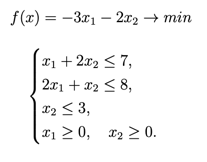

In [2]:
Image(filename='img/task5.png')

## Построим многогранник решений 

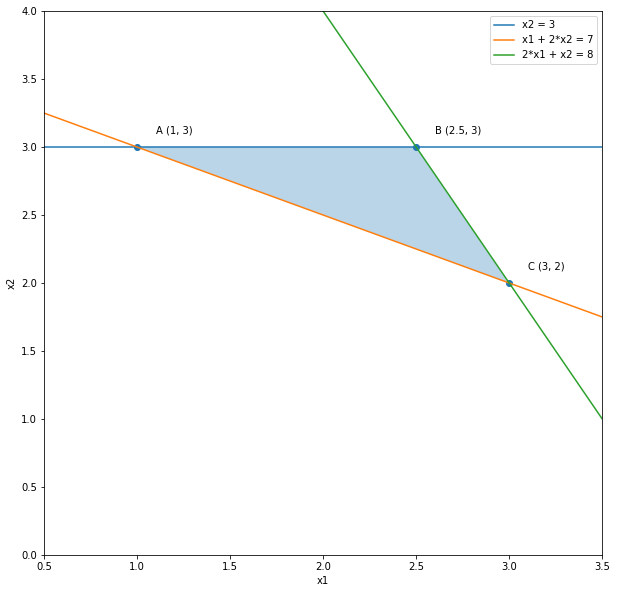

In [3]:
def base_ax():
    fig, ax = plt.subplots()
    ax.set_ylabel('x2')
    ax.set_xlabel('x1')
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(Y_MIN, Y_MAX)

    return ax


def draw_solve_area(ax):
    points = [
        ('A', (1, 3)),
        ('B', (2.5, 3)),
        ('C', (3, 2))
    ]
    point_x = list(map(lambda p: p[1][0], points))
    point_y = list(map(lambda p: p[1][1], points))
    ax.scatter(point_x, point_y)

    for p, (px, py) in points:
        txt = f'{p} ({px}, {py})'
        ax.text(px + 0.1, py + 0.1, txt)

    poly = plt.Polygon(list(map(lambda x: x[1], points)), alpha=0.3)
    ax.add_patch(poly)


ax = base_ax()

draw_segment(ax, lambda x1: 3, label='x2 = 3')
draw_segment(ax, lambda x1: (7 - x1) / 2, label='x1 + 2*x2 = 7')
draw_segment(ax, lambda x1: (8 - 2 * x1), label='2*x1 + x2 = 8')

draw_solve_area(ax)

plt.legend()
plt.show()

## Построим данную функцию и ее градиент. 

Для удобства построим -3x1 - 2x2 = -5.
<=>
3x1 + 2x2 = 5
<=>
2x2 = 5 - 3x1
x2 = 5/2 - 3/2 * x1
k = -3/2

Вектор градиента (-3, -2)

Вспоминая уравнение нормали
y–y1=-1/k(x-x1)
<=>
y = y1 - 1/k * (x - x1)

Построим ее

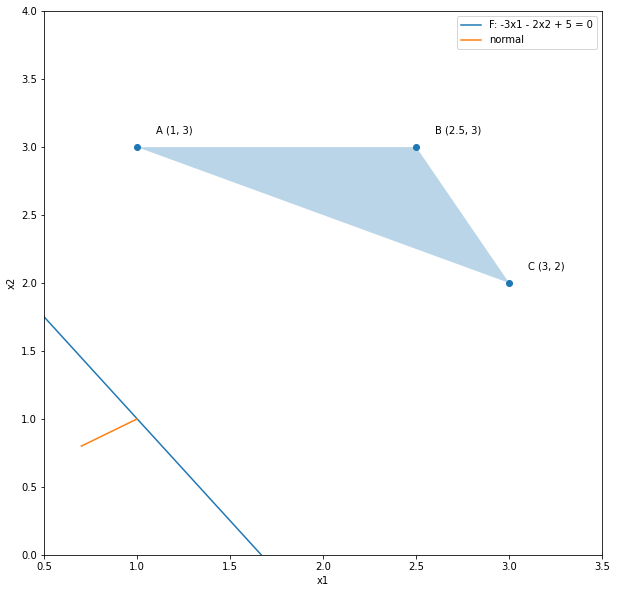

In [4]:

def draw_F_with_normal_from_dot(ax, x, y, normal_x_len=0.7):

    b = -F_task(x, y)
    draw_segment(ax, lambda x1: F(x1, b=b), label=f'F: -3x1 - 2x2 + {b} = 0')

    def normal_Fx(x1):
        return y - (1 / -(3 / 2)) * (x1 - x)

    draw_segment(ax, normal_Fx, label='normal', x1=x - normal_x_len, x2=x)


ax = base_ax()
draw_solve_area(ax)
draw_F_with_normal_from_dot(ax, 1, 1, normal_x_len=0.3)

plt.legend()
plt.show()

## Отсюда видно, что первое вхождение в область решений это точка B.

В данном случае мы двигаемся в направлении, обратномм нормали. Поэтому
тут первое вхождение при движении в сторону нормали, есть последнее 
вхождение при движении в обратную строну  

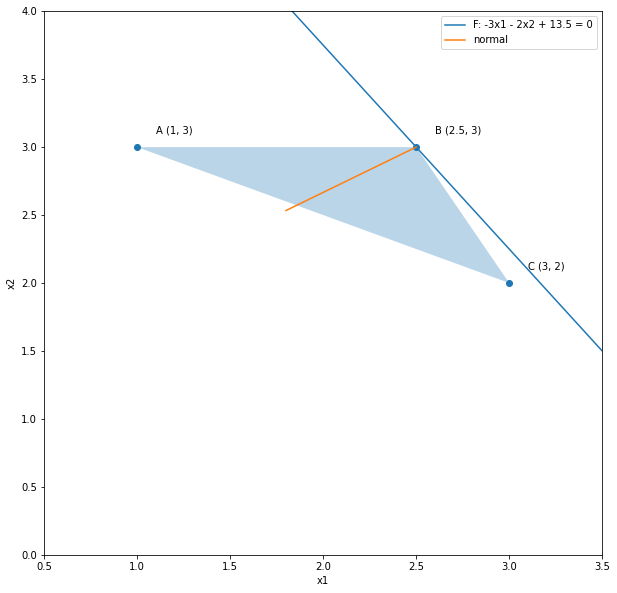

In [5]:

ax = base_ax()
draw_solve_area(ax)
draw_F_with_normal_from_dot(ax, 2.5, 3, normal_x_len=0.7)

plt.legend()
plt.show()

## Для наглядности покажем значения функций в точках

In [6]:
print(f'''
F(A) = {F_task(1, 3)}
F(B) = {F_task(2.5, 3)}
F(C) = {F_task(3, 2)}
''')



F(A) = -9
F(B) = -13.5
F(C) = -13

